In [1]:
# Install required packages
!pip install -q pandas openpyxl xgboost scikit-learn seaborn matplotlib

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [4]:
# Load the dataset
file_path = '/content/ipl2025.csv.xlsx'  # Upload this file to Colab manually
df = pd.read_excel(file_path, sheet_name='Sheet1')

In [5]:

# Encode categorical data
le = LabelEncoder()
df['team_1_enc'] = le.fit_transform(df['team_1'])
df['team_2_enc'] = le.transform(df['team_2'])  # Ensure consistent encoding
df['winner_enc'] = le.transform(df['winner'])

In [6]:
# Prepare features and target
X = df[['team_1_enc', 'team_2_enc']]
y = df['winner_enc']

In [7]:

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Train XGBoost model
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:44:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [9]:
# Predict and evaluate
y_pred = model.predict(X_test)
print("XGBoost Model Accuracy:", accuracy_score(y_test, y_pred))

XGBoost Model Accuracy: 0.35714285714285715


In [10]:

# Predict match between GT and MI
team_1 = 'gt'
team_2 = 'mi'
team_1_enc = le.transform([team_1])[0]
team_2_enc = le.transform([team_2])[0]
prediction = model.predict([[team_1_enc, team_2_enc]])
predicted_winner = le.inverse_transform(prediction)[0]

print(f"Predicted Winner between {team_1.upper()} and {team_2.upper()}: {predicted_winner.upper()}")

Predicted Winner between GT and MI: GT


<ipython-input-11-93011acd41a9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='winner', order=df['winner'].value_counts().index, palette='coolwarm')


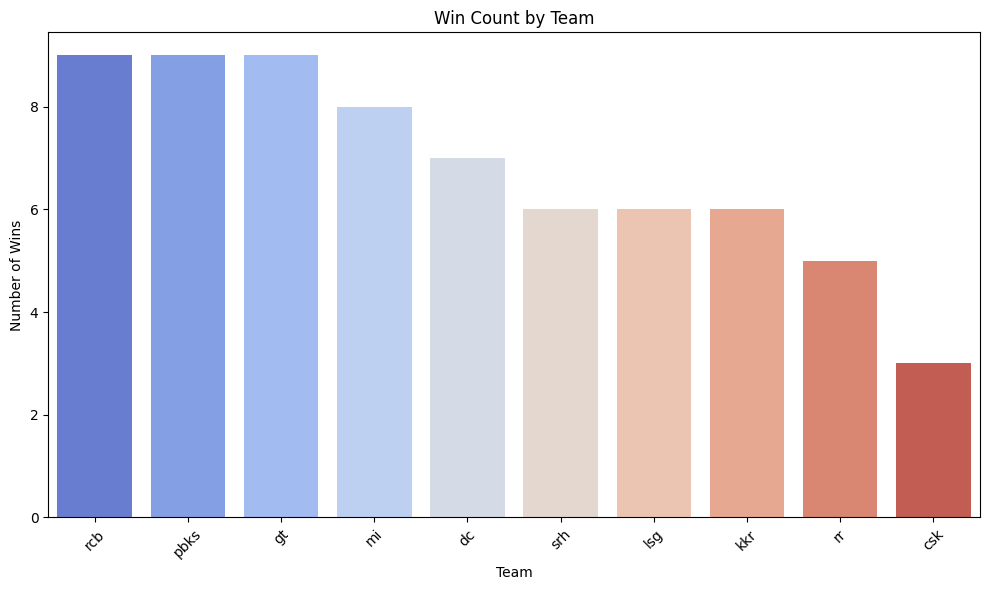

In [11]:
# 1. Win distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='winner', order=df['winner'].value_counts().index, palette='coolwarm')
plt.title("Win Count by Team")
plt.xlabel("Team")
plt.ylabel("Number of Wins")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


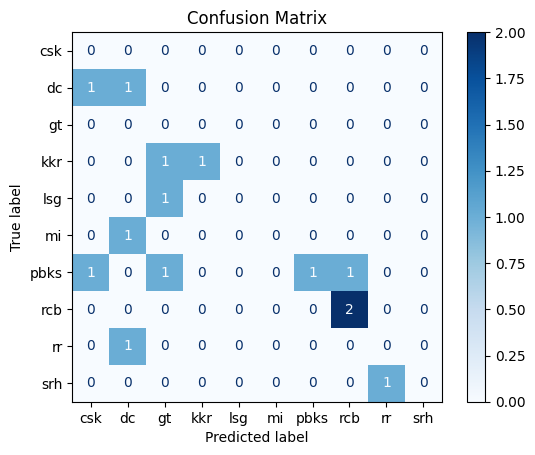

In [12]:
# 2. Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

<ipython-input-14-825c7308e9c3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette='viridis')


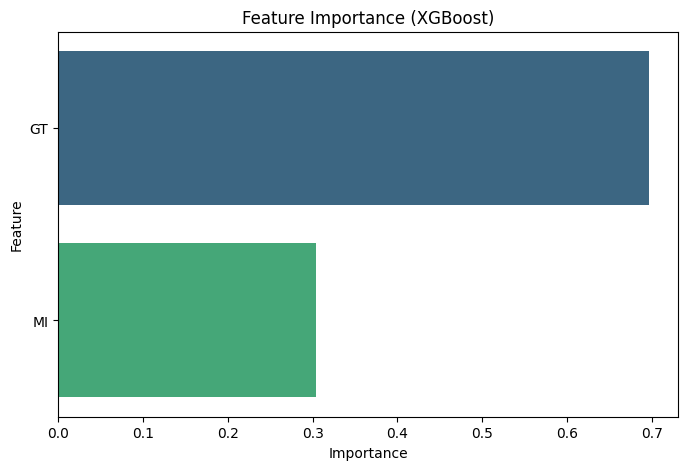

In [14]:
# 3. Feature importance
importances = model.feature_importances_
feature_names = ['GT', 'MI']

plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=feature_names, palette='viridis')
plt.title("Feature Importance (XGBoost)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()